# Trying methods on titanic dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Read data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y = train_data['Survived']
train_data = train_data.drop(labels='Survived', axis=1)

In [5]:
def transform_features(data):
    #data['Sex'] = map(lambda x: 1 if x == 'male' else 0, data['Sex'])
    data.drop(labels=['PassengerId', 'Ticket', 'Name', 'Cabin'], 
                             axis=1, inplace=True)
    #data['Embarked'] = data['Embarked'].fillna(value='N')
    #data['Embarked'] = map(lambda x: ord(x) if x != 'N' else 0, data['Embarked'])
    data = data.fillna(value=0, inplace=True)

In [6]:
transform_features(train_data)
transform_features(test_data)

### Primary analysis

In [519]:
train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,23.799293,0.523008,0.381594,32.204208
std,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.000000,0.000000,7.910400
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


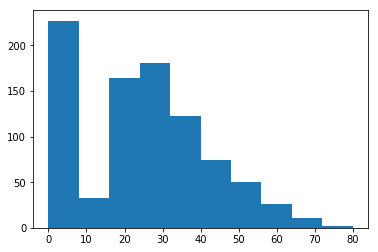

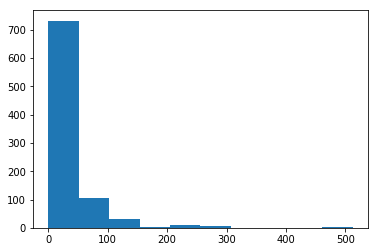

In [520]:
plt.hist(train_data['Age'].fillna(-10))
plt.show()
plt.hist(train_data['Fare'])
plt.show()

### Features preprocessing

In [521]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [522]:
cat_columns = ['Sex', 'Embarked']
real_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'] 

In [523]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
real_scaled_data = scaler.fit_transform(train_data[real_features])

In [524]:
from sklearn.feature_extraction import DictVectorizer as DV
encoder = DV(sparse=False)
cat_encode_data = encoder.fit_transform(train_data[cat_columns].T.to_dict().values())

### Write to csv file for submit

In [62]:
def write_to_csv(filename, columns, pred):
    pred = np.array(pred)
    ids = np.array(test_ids)
    st = np.column_stack((ids, pred))
    from csv import writer
    with open(filename, 'w') as file:
        fieldnames = columns
        wr = writer(file, fieldnames)
        wr.writerow(fieldnames)
        for i in st:
            wr.writerow(i)

### Try linear model

In [526]:
from sklearn.linear_model import LogisticRegressionCV
X = np.hstack((real_scaled_data, cat_encode_data))
clf = LogisticRegressionCV()
score = cross_val_score(clf, X, y)
print score.mean()

0.785634118967


In [527]:
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [528]:
transform_features(test_data)
test_real_scaled = scaler.transform(test_data[real_features])
test_cat_encode = encoder.transform(test_data[cat_columns].T.to_dict().values())
test = np.hstack((test_real_scaled, test_cat_encode))

In [529]:
print test.shape
pred = clf.predict(test)
write_to_csv('check.csv', ['PassengerId', 'Survived'], pred)

(418, 11)


### Try random forest

In [530]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
X = np.hstack((real_scaled_data, cat_encode_data))
clf = RandomForestClassifier()
score = cross_val_score(clf, X, y)

In [531]:
print score.mean()

0.791245791246


In [534]:
clf.fit(X, y)
#transform_features(test_data)
test_real_scaled = scaler.transform(test_data[real_features])
test_cat_encode = encoder.transform(test_data[cat_columns].T.to_dict().values())
test = np.hstack((test_real_scaled, test_cat_encode))
pred = clf.predict(test)

In [ ]:
write_to_csv('check.csv', ['PassengerId', 'Survived'], pred)

### Try xgboost

In [535]:
from xgboost import XGBClassifier

In [559]:
clf = XGBClassifier(max_depth=5, n_estimators=100)
X = np.hstack((real_scaled_data, cat_encode_data))
score = cross_val_score(clf, X, y)

In [560]:
print score.mean()

0.819304152637


In [561]:
clf.fit(X, y)
#transform_features(test_data)
test_real_scaled = scaler.transform(test_data[real_features])
test_cat_encode = encoder.transform(test_data[cat_columns].T.to_dict().values())
test = np.hstack((test_real_scaled, test_cat_encode))
pred = clf.predict(test)

In [541]:
write_to_csv('check.csv', ['PassengerId', 'Survived'], pred)

### Try Gridsearch

In [807]:
X = np.hstack((real_scaled_data, cat_encode_data))
clf = XGBClassifier(n_estimators=100)
clf.get_params().keys()
clf.fit(X, y)
pass
#clf.get_params()

In [577]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
parameters_grid = {
    'max_depth' : [1,3,5,10],
    'n_estimators' : [5,10,100],
    'learning_rate' : [0.1,0.15,0.3],
}
grid_cv = GridSearchCV(clf, parameters_grid)

In [576]:
%%time 
grid_cv.fit(X, y)

CPU times: user 7.41 s, sys: 7.07 s, total: 14.5 s
Wall time: 9.07 s


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 100], 'learning_rate': [0.1, 0.15, 0.3], 'max_depth': [1, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [558]:
grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [579]:
grid_cv = GridSearchCV(clf, parameters_grid)

In [580]:
%%time 
grid_cv.fit(X, y)

CPU times: user 7.28 s, sys: 6.88 s, total: 14.2 s
Wall time: 9.05 s


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 100], 'learning_rate': [0.1, 0.15, 0.3], 'max_depth': [1, 3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [581]:
grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

### Make a pipeline

In [65]:
from sklearn import pipeline
from sklearn import preprocessing
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
test_ids = test_data['PassengerId']

In [50]:
def transform_features(data):
    data.drop(labels=['PassengerId', 'Ticket', 'Name', 'Cabin'], 
                             axis=1, inplace=True)
    data.fillna(value=0, inplace=True)
    data['Embarked'] = map(lambda x: ord(x) if x in {'S', 'Q', 'C'} else 0, data['Embarked'])
    data['Sex'] = map(lambda x: 1 if x == 'male' else 0, data['Sex'])
transform_features(train_data)
transform_features(test_data)

In [51]:
y = train_data['Survived']
train_data = train_data.drop(labels='Survived', axis=1)

In [52]:
cat_columns = ['Sex', 'Embarked']
real_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'] 
real_data_indices = np.array([(column in real_features) for column in train_data.columns], dtype = bool)
cat_data_indices = np.array([(column in cat_columns) for column in train_data.columns], dtype = bool)

In [53]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_preprocessing', pipeline.FeatureUnion(transformer_list = [        
            #real
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, real_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, cat_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', clf)
    ]
)

In [806]:
estimator.fit(train_data, y)
pred = estimator.predict(test_data)
write_to_csv('check.csv', ['PassengerId', 'Survived'], pred)

In [54]:
from sklearn.manifold.t_sne import TSNE
model = TSNE(method='exact')

In [55]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_preprocessing', pipeline.FeatureUnion(transformer_list = [        
            #real
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, real_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, cat_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', model)
    ]
)

In [56]:
transformed_train_data = estimator.fit_transform(train_data)

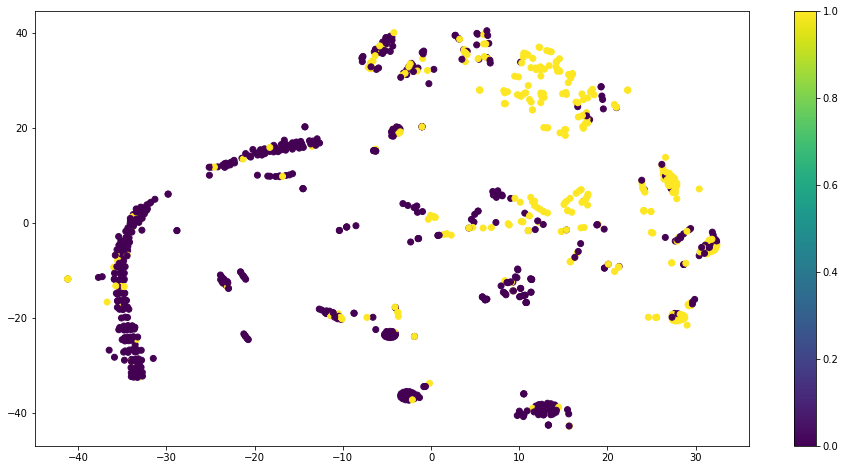

In [28]:
plt.figure(figsize=(16,8))
plt.scatter(transformed_train_data[:, 0], transformed_train_data[:, 1], c=y)
plt.colorbar()

In [35]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
clf = LogisticRegressionCV()
score = cross_val_score(clf, transformed_train_data, y)
print score.mean()

0.780022446689


In [ ]:
clf = XGBClassifier(n_estimators=100, max_depth=5)
clf.fit(transformed_train_data, y)
transformed_test_data = estimator.fit_transform(test_data)

In [66]:
pred = clf.predict(transformed_test_data)
test_ids = test_data['PassengerId']
write_to_csv('check.csv', ['PassengerId', 'Survived'], pred)